<a href="https://colab.research.google.com/github/lucasloch/metodos_numericos/blob/main/MN_Lista2_Lucas_Vitor_Loch_Pereira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
  <img src="https://www.aedi.ufpa.br/biologia/images/M_images/BioDistan/UFPA-LOGO.png" alt="UFPA logo" width=100/>
</p>

<p align="center">
  <strong>Universidade Federal do Pará (UFPA) - Tucuruí, PA - Brasil</strong><br>
  <strong>Faculdade de Engenharia de Computação</strong>
</p>

---

# Lista 2 da Disciplina de **Métodos Numéricos para Engenharia**

---

> Docente: **Otávio Noura Teixeira**<br>
> Discente: **Lucas Vitor Loch Pereira**<br>
> Matrícula: **201833840013**<br>
> Data: **24/10/2022**



---
## Questão 1
Dados os pontos abaixo, determine y para x = 0 usando: (a) método de Neville e (b) método de Lagrange.
<h1><center>

|     |     |       |       |       |
|:---:|:---:| :---: | :---: | :---: |
|  x  |     | -1.2  | 0.3   | 1.1   |
|  y  |     | -5.76 | -5.61 | -3.69 |

</center></h1>

In [2]:
import numpy as np

# Método de Neville
def metodo_neville(xi, yi):
  n = x.size
  G = np.zeros((n, n))
  G[:,0] = y
  for i in range(1, n):
    for j in range(1, i+1):
      G[i, j] = ((xi - x[i-j])*G[i, j-1]-(xi - x[i])*G[i - 1, j - 1])/(x[i]-x[i-j])
      yi = G[i,i]
      if abs(G[i,j] - G[i-1, i-1]) < 1e-5:
        exit
  
  return G, yi

#Método de Lagrange
def metodo_lagrange(xi, yi):
  n = x.size

  for i in range(0, n):
    produto = y[i]
    for j in range(0, n):
      if i != j:
        produto = produto * (xi - x[j])/(x[i]-x[j])
    yi += produto
  
  return yi

In [3]:
x = np.array([-1.2, 0.3, 1.1])
y = np.array([-5.76, -5.61, -3.39])

xi = 0
yi = 0
G, yi = metodo_neville(xi, yi)
print('(a) Método de Neville')
print(G)
print(yi)

xi = 0
yi = 0
yi = metodo_lagrange(xi, yi)
print('\n(b) Método de Lagrange')
print(yi)

(a) Método de Neville
[[-5.76        0.          0.        ]
 [-5.61       -5.64        0.        ]
 [-3.39       -6.4425     -6.05869565]]
-6.058695652173914

(b) Método de Lagrange
-6.058695652173913


---
## Questão 2
Encontre o zero para y(x) para os seguintes pontos:
<h1><center>

|     |     |        |        |        |        |        |         |         |
|:---:|:---:| :---:  | :---:  | :---:  | :---:  | :---:  |  :---:  |  :---:  |
|  x  |     | 0      | 0.5    | 1      | 1.5    | 2      | 2.5     | 3       |
|  y  |     | 1.1841 | 2.4694 | 2.4921 | 1.9047 | 0.8509 | -0.4112 | -1.5727 |

</center></h1>
Utilize interpolação de Lagrange sobre (a) três pontos vizinhos mais próximos, (b) quatro pontos vizinhos mais próximos.


---
## Questão 3
Para os dados
<h1><center>

|     |     |         |        |        |        |        |
|:---:|:---:|  :---:  | :---:  | :---:  | :---:  | :---:  |
|  x  |     | 0       | 0.5    | 1      | 1.5    | 2      |
|  y  |     | -0.7854 | 0.6529 | 1.7390 | 2.2071 | 1.9425 |

</center></h1>
encontre y para x = π/4 e x = π/2. Utilize qualquer método de interpolação.

In [4]:
import numpy as np

def metodo_lagrange(xi, yi):
  n = x.size
  for i in range(0, n):
    produto = y[i]
    for j in range(0, n):
      if i != j:
        produto = produto * (xi - x[j])/(x[i]-x[j])
    yi += produto
  return yi

In [5]:
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([-0.7854, 0.6529, 1.7390, 2.2071, 1.9425])

print('Utilizando Método de Lagrange')

xi = np.pi/4
yi = 0
print('Para x = π/4:', metodo_lagrange(xi, yi))

xi = np.pi/2
yi = 0
print('Para x = π/2:', metodo_lagrange(xi, yi))

Utilizando Método de Lagrange
Para x = π/4: 1.3364947265058857
Para x = π/2: 2.214943970123967


---
## Questão 4
Utilize o método de Newton para encontrar o polinômio que satisfaça os seguintes pontos:
<h1><center>

|     |     |     |     |     |     |     |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|  x  |     | -3  |  2  | -1  |  3  |  1  |
|  y  |     |  0  |  5  | -4  | 12  |  0  |

</center></h1>

In [6]:
import matplotlib.pyplot as plt
import numpy as np

#Método das Diferenças Divididas de Newton
def DDN(x, y):
    n = len(x)
    A = np.zeros((n, n+1))
    A[:,0]= x[:]
    A[:,1]= y[:]
    for j in range(2, n+1):
        for i in range(j-1, n):
            A[i,j] = (A[i, j-1]-A[i-1, j-1]) / (A[i, 0]-A[i-j+1, 0])
    p = np.zeros(n)
    for k in range(0, n):
        p[k] = A[k, k+1]
    return p

#Avalia o polinômio em 't' dados os valores de x e coeficientes
def aval_poli(t, x, p):
    n = len(x)
    out = p[n-1]
    for i in range(n-2, -1, -1):
        out = out*(t-x[i]) + p[i]
    return out

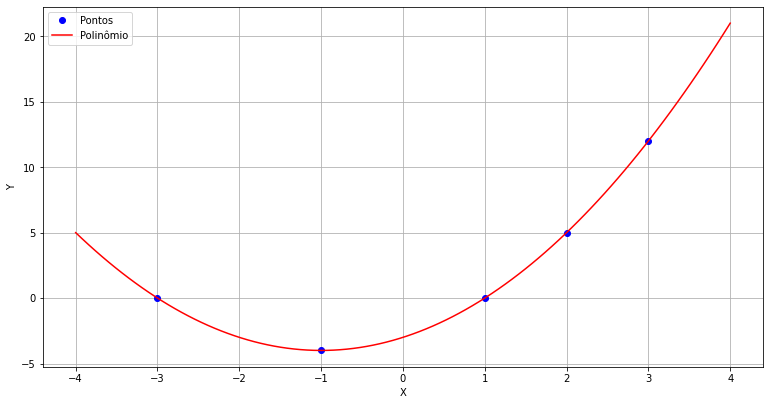

In [7]:
x = np.array([-3,2,-1,3,1])
y = np.array([0,5,-4,12,0])

a = DDN(x, y)
tval = np.linspace(min(x)-1, max(x)+1, 100)
yval = aval_poli(tval, x, a)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, 'ro', label = 'Pontos', color = 'blue')
ax.plot(tval, yval, label = 'Polinômio', color = 'red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(loc='best')
ax.grid()
plt.show()

---
## Questão 5
Dados os pontos:
<h1><center>

|     |     |     |     |     |     |     |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|  x  |     |  1  |  2  |  3  |  4  |  5  |
|  y  |     | 13  | 15  | 12  |  9  | 13  |

</center></h1>
calcule a interpolação spline cúbica no ponto x = 3,4.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando a interpolação cúbica de um vetor de pontos
def interpolacao_cubica(x0, x, y):
  size = len(x)
  
  # Calcula as diferenças
  xdiff = np.diff(x)
  ydiff = np.diff(y)

  # Definindo as matrizes que serão utilizadas
  Li = np.empty(size)
  Li_1 = np.empty(size-1)
  z = np.empty(size)

  # Preenchendo as diagonais Li and Li-1 e resolver [L][y] = [B]
  Li[0] = np.sqrt(2*xdiff[0])
  Li_1[0] = 0.0
  B0 = 0.0
  z[0] = B0 / Li[0]

  for i in range(1, size-1):
    Li_1[i] = xdiff[i-1] / Li[i-1]
    Li[i] = np.sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
    Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

  i = size - 1
  Li_1[i-1] = xdiff[-1] / Li[i-1]
  Li[i] = np.sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
  Bi = 0.0
  z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

  # Resolvendo [L.T][x] = [y]
  i = size-1
  z[i] = z[i] / Li[i]
  for i in range(size-2, -1, -1):
    z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

  # Definindo os índices dos pontos de interpolação
  index = x.searchsorted(x0)
  np.clip(index, 1, size-1, index)

  xi1, xi0 = x[index], x[index-1]
  yi1, yi0 = y[index], y[index-1]
  zi1, zi0 = z[index], z[index-1]
  hi1 = xi1 - xi0

  # Calculando os valores de interpolacao
  f0 = zi0 / (6*hi1)*(xi1-x0)**3 +  zi1/(6*hi1)*(x0-xi0)**3 + (yi1/hi1 - zi1*hi1/6)*(x0-xi0) +  (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
  return f0

O valor no ponto x=3.4 é: 10.22



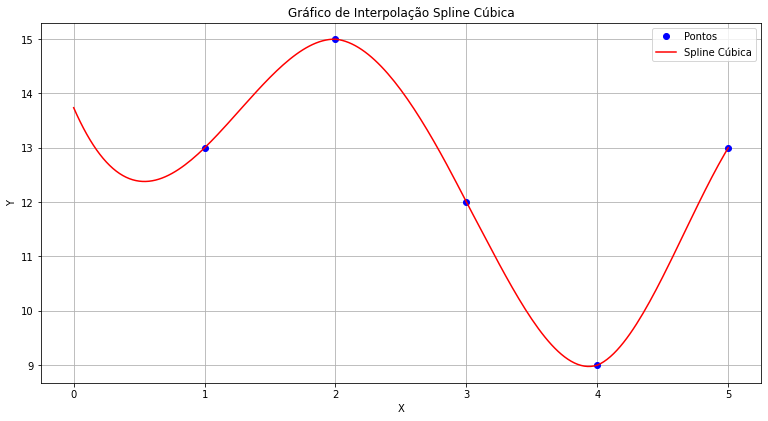

In [9]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([13, 15, 12, 9, 13])

x_new = np.linspace(0, 5, 201) 
result = interpolacao_cubica(x_new, x, y)

for i in range(len(x_new)):
  if round(x_new[i], 4) == 3.4:
    print(f'O valor no ponto x=3.4 é: {result[i]:.2f}\n')
    break

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, 'ro', label = 'Pontos', color = 'blue')
ax.plot(x_new, result, 'b', label = 'Spline Cúbica', color = 'red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Gráfico de Interpolação Spline Cúbica')
ax.legend(loc='best')
ax.grid()
plt.show()

---
## Questão 6
Calcule o zero da função y(x) a partir dos seguintes dados:
<h1><center>

|     |     |       |       |       |        |        |
|:---:|:---:| :---: | :---: | :---: | :---:  | :---:  |
|  x  |     |  0.2  |  0.4  |  0.6  |  0.8   |  1.0   |
|  y  |     | 1.150 | 0.855 | 0.377 | -0.266 | -1.049 |

</center></h1>
Utilize interpolação spline cúbica.

O valor no ponto x = 0 é: 1.55



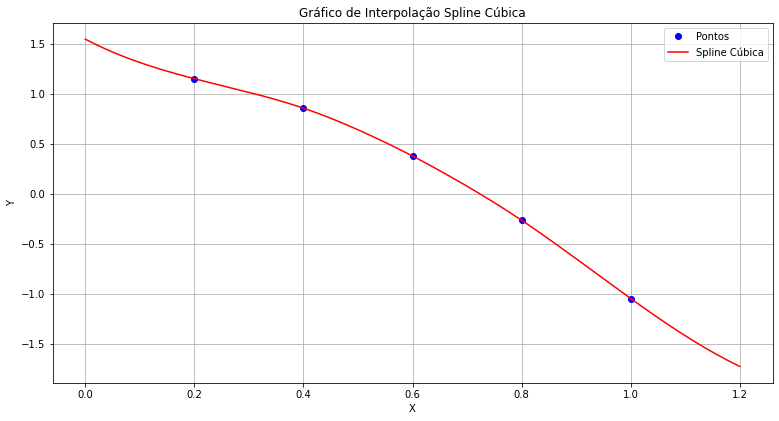

In [33]:
# Fazendo uso da função criada na questão

x = np.array([.2, .4, .6, .8, 1])
y = np.array([1.15, .855, .377, -0.266, -1.049])

x_new = np.linspace(0, 1.2, 201) 
result = interpolacao_cubica(x_new, x, y)

for i in range(len(x_new)):
  if round(x_new[i], 4) == 0:
    print(f'O valor no ponto x = 0 é: {result[i]:.2f}\n')
    break

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, 'ro', label = 'Pontos', color = 'blue')
ax.plot(x_new, result, 'b', label = 'Spline Cúbica', color = 'red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Gráfico de Interpolação Spline Cúbica')
ax.legend(loc='best')
ax.grid()
plt.show()

---
## Questão 7
Utilize regressão linear para encontrar a linha que mais se aproxima dos dados abaixo. Calcule o desvio padrão entre dos dados e a linha obtida por regressão linear.
<h1><center>

|     |     |       |       |      |      |      |
|:---:|:---:| :---: | :---: |:---: |:---: |:---: |
|  x  |     |  -1.0 |  -0.5 |   0  |  0.5 |  1.0 |
|  y  |     | -1.00 | -0.55 | 0.00 | 0.45 | 1.00 |

</center></h1>

Inclinação:  1.0
Coeficiente de Determinação:  0.9994005394605663
Dados Corrigidos: [-1.02 -0.52 -0.02  0.48  0.98]
Desvio padrão: 0.7071067811865476



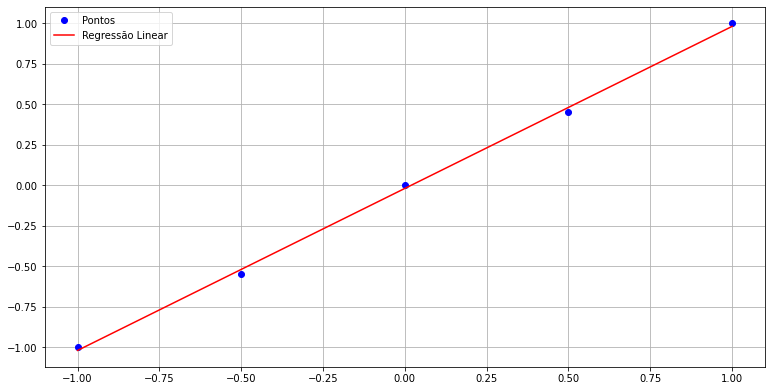

In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.array([-1.0, -0.5, 0, 0.5, 1.0])
y = np.array([-1.00, -0.55, 0.00, 0.45, 1.00])

m, b, r, p, std_err = stats.linregress(x, y)

print('Inclinação: ', m)
print('Coeficiente de Determinação: ', r)
y_pred = m * x + b
print('Dados Corrigidos:', y_pred)
print(f'Desvio padrão: {np.std(y_pred)}\n')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, 'ro', label = 'Pontos', color = 'blue')
ax.plot(x, y_pred, label = 'Regressão Linear', color = 'red')
ax.legend()
ax.grid()
plt.show()

---
## Questão 8
Três testes de tensão (stress) foram realizados em uma barra de alumínio. Em cada teste, a deformação (strain) foi medida para quatro diferentes valores de tração. Os resultados foram:
<h1><center>

|                   ||      |       |      |      |
|       :---:       ||:---: |:---: | :---: | :---: |
|    Stress (MPa)   || 34.5 | 0.69 | 103.5 | 138.0 |
|  Strain (Test 1)  || 0.46 | 0.95 | 1.48  | 1.93  |
|  Strain (Test 2)  || 0.34 | 1.02 | 1.51  | 2.09  |
|  Strain (Test 3)  || 0.73 | 1.10 | 1.62  | 2.12  |

</center></h1>
Onde a unidade de deformação é mm/m. Use regressão linear para estimar o módulo de elasticidade da barra de alumínio (módulo de elasticidade = tensão/deformação).

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def calcula_coeficientes(X, y):
    n = len(X)
    sum_X = np.sum(X)
    sum_Y = np.sum(y)
    sum_XY = np.sum(X * y)
    sum_X2 = np.sum(X * X)
    b1 = (n * sum_XY - sum_X * sum_Y) / (n * sum_X2 - sum_X * sum_X)
    b0 = (sum_Y - b1 * sum_X) / n
    return np.array([b0, b1])

Coeficientes: [-0.0016666666666644108, 0.014850241545893695]
Módulo de elasticidade: 67.34 GPa


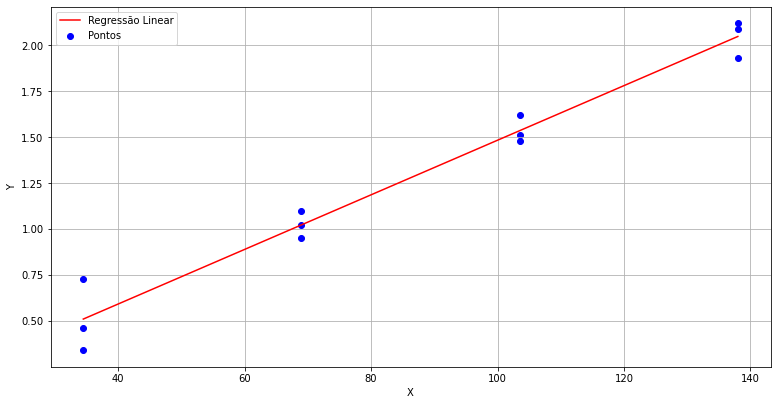

In [13]:
x = np.array([34.5, 34.5, 34.5, 69.0, 69.0, 69.0, 103.5, 103.5, 103.5, 138.0, 138.0, 138.0])
y = np.array([0.46, 0.34, 0.73, 0.95, 1.02, 1.10, 1.48, 1.51, 1.62, 1.93, 2.09, 2.12])

b0, b1 = calcula_coeficientes(x, y)
print(f'Coeficientes: [{b0}, {b1}]')

f = b0 + b1 * x
regression = lambda x: b0 + b1 * x
modulo_elasticidade = (x[-1]-x[0])/(f[-1]-f[0])
print(f'Módulo de elasticidade: {modulo_elasticidade:.2f} GPa')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.scatter(x, y, color='blue', label='Pontos')
ax.plot(x, regression(x), color='red', label='Regressão Linear')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(loc='best')
ax.grid()
plt.show()

---
## Questão 9
Encontre a linha reta e a parábola que mais se aproximem dos pontos abaixo. Qual delas melhor se aproxima?
<h1><center>

|     ||       |        |        |        |       |       |        |        |
|:---:|| :---: | :---:  | :---:  | :---:  | :---: | :---: | :---:  | :---:  |
|  x  ||  1.0  |  2.5   |  3.5   |  4.0   |  1.1  |  1.8  |  2.2   |  3.7   |
|  y  || 6.008 | 15.722 | 27.130 | 33.772 | 5.257 | 9.549 | 11.098 | 28.828 |

</center></h1>

Melhores Pontos:
[-5.12738723e-01  7.17568750e+00 -3.17117453e+01 -2.86799526e+00
  4.77150856e+02 -1.71064511e+03  2.76331250e+03 -2.16271655e+03
  6.66823100e+02]



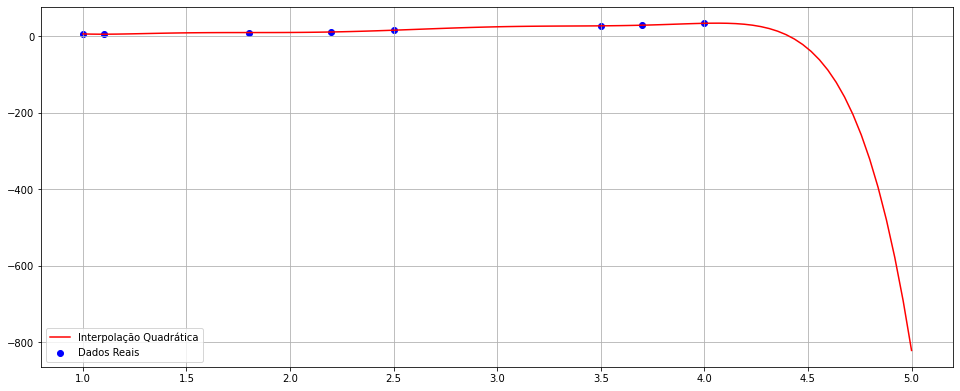

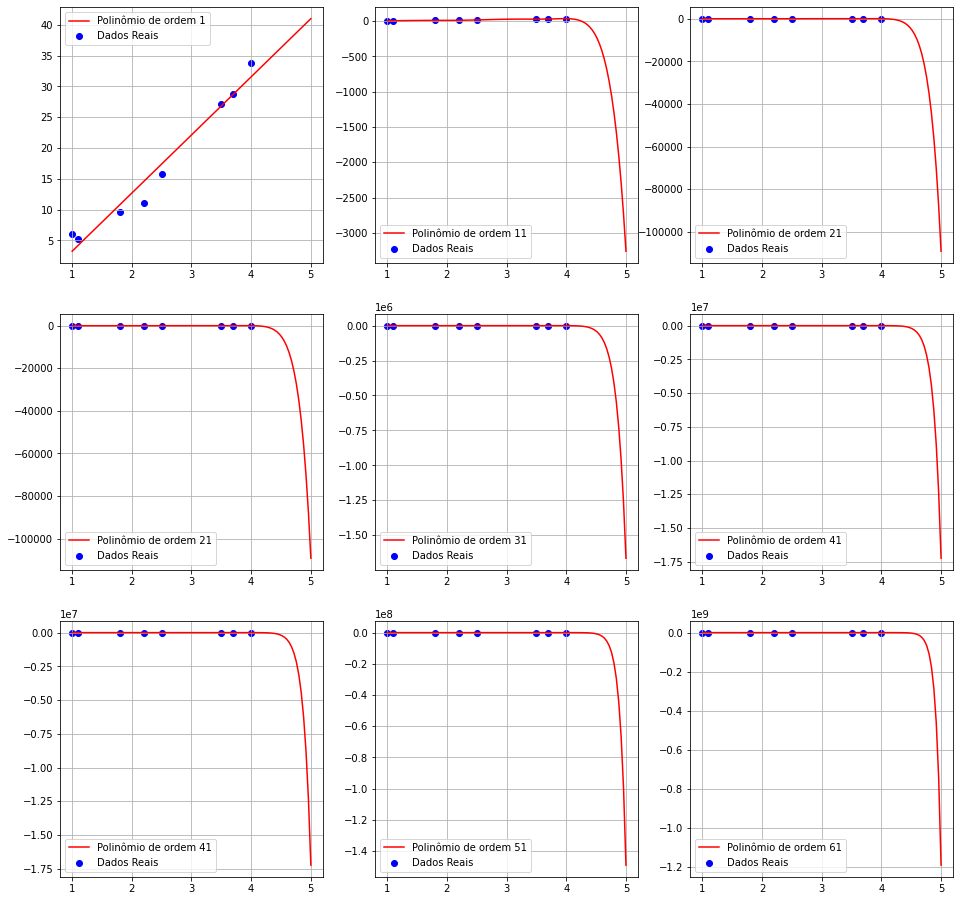

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

x = np.array([1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7])
y = np.array([6.008, 15.7222, 27.130, 33.772, 5.257, 9.549, 11.098, 28.828])
xs = np.linspace(1.0, 5.0, 100)

p = np.polyfit(x, y, x.size)
print(f'Melhores Pontos:\n{p}\n')

fig = plt.figure(figsize=(12.66, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(x, y, color = 'blue', label = 'Dados Reais')
ax.plot(xs, np.polyval(p,xs), 'red', label = 'Interpolação Quadrática')
ax.legend(loc='best')
ax.grid()
plt.show()

# A função "polyfit" gera um aviso para que verifiquemos o resultado novamente com filtros de ordem menor,
# por isso fazemos mais alguns testes por garantia
fig,ax = plt.subplots(3,3,figsize = (16,16))
for n in range(3):
    for k in range(3):
        order = 20*n+10*k+1
        p = np.polyfit(x, y, order)
        ax[n,k].scatter(x, y, color = 'blue', label = 'Dados Reais')
        ax[n,k].plot(xs, np.polyval(p,xs), 'red', label = f'Polinômio de ordem {order}')
        ax[n,k].legend()
        ax[n,k].grid()
plt.show()

---
## Questão 10
A tabela abaixo exibe a eficiência térmica dos primeiros motores a vapor. Utilize regressão linear para predizer qual seria a eficiência dos motores a vapor no ano 2000.
<h1><center>

| Year || Efficiency (%) | Type             |
|:---: ||     :---:      | :---             |
| 1718 ||      0.5       | Newcomen         |
| 1767 ||      0.8       | Smeaton          |
| 1774 ||      1.4       | Smeaton          |
| 1775 ||      2.7       | Watt             |
| 1792 ||      4.5       | Watt             |
| 1816 ||      7.5       | Woolf compound   |
| 1828 ||      12.0      | Improved Cornish |
| 1834 ||      17.0      | Improved Cornish |
| 1878 ||      17.2      | Corliss compound |
| 1906 ||      23.0      | Triple expansion |

</center></h1>

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

year = np.array([1718, 1767, 1774, 1775, 1792, 1816, 1828, 1834, 1878, 1906]).reshape((-1,1))
eficiencia = np.array([0.5, 0.8, 1.4, 2.7, 4.5, 7.5, 12.0, 17.0, 17.2, 23.0])

modelo = LinearRegression().fit(year,eficiencia)
modelo.score(year, eficiencia)

print('Atributos do modelo:')
# Termo independente no modelo linear
print(f'- Interceptação: {modelo.intercept_}')
# Coeficientes estimados para o problema de regressão linear
print(f'- Inclinação: {modelo.coef_}')

novo_x = np.array([2000]).reshape((-1,1))
previsao = modelo.predict(novo_x)

print(f'\nEficiência dos motores a vapor no ano 2000: {previsao[0]:.2f}')

Atributos do modelo:
- Interceptação: -240.39174630009032
- Inclinação: [0.13768894]

Eficiência dos motores a vapor no ano 2000: 34.99


---
## Questão 11
A tabela abaixo mostra a variação da condutividade térmica relativa k do sódio em função da temperatura T. Encontre a curva quadrática que melhor se ajuste utilizando regressão linear.
<h1><center>

|        ||      |       |       |       |       |
| :---:  ||:---: | :---: | :---: | :---: | :---: |
| T (ºC) ||  79  |  190  |  357  |  524  |  690  |
|   k    || 1.00 | 0.932 | 0.839 | 0.759 | 0.693 |

</center></h1>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
 
def estimador_coef(x, y):
  n = np.size(x) 
  # Média dos vetores x e y
  m_x = np.mean(x)
  m_y = np.mean(y) 
  # Cálculo dos desvios em relação a x e y
  d_xy = np.sum(y*x) - n*m_y*m_x
  d_xx = np.sum(x*x) - n*m_x*m_x
  # Cálculo dos coeficientes de regressão
  b_1 = d_xy / d_xx
  b_0 = m_y - b_1*m_x
 
  return (b_0, b_1)

Coeficientes Estimados:
b_0 = 1.0299640495426263
b_1 = -0.0005037066563658323



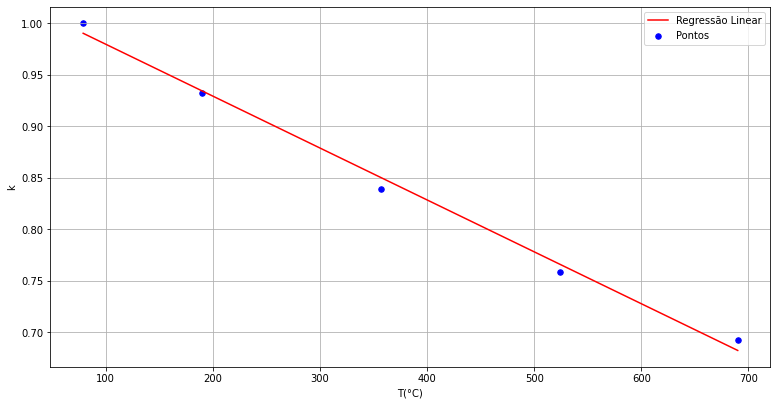

In [17]:
x = np.array([79, 190, 357, 524, 690])
y = np.array([1, 0.932, 0.839, 0.759, 0.693])

b = estimador_coef(x, y)
print(f'Coeficientes Estimados:\nb_0 = {b[0]}\nb_1 = {b[1]}\n')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(x, y, label = 'Pontos', color = 'blue', marker = 'o', s = 30)
# Vetor predição
y_pred = b[0] + b[1]*x
ax.plot(x, y_pred, 'red', label = 'Regressão Linear')
ax.set_xlabel('T(°C)')
ax.set_ylabel('k')
ax.legend(loc='best')
ax.grid()
plt.show()

---
## Questão 12
Determine a e b para que $f(x) = a sin(π x/2) + b cos(π x/2)$ melhor se ajuste aos dados da tabela abaixo:
<h1><center>

|     ||        |        |        |        |        |       |
|:---:|| :---:  | :---:  | :---:  | :---:  | :---:  | :---: |
|  x  ||  -0.5  | -0.19  |  0.02  |  0.20  |  0.35  | 0.50  |
|  y  || -3.558 | -2.874 | -1.995 | -1.040 | -0.068 | 0.677 |

</center></h1>

In [18]:
import numpy as np
from scipy import stats

x = np.array([-0.5, -0.19, 0.02, 0.20, 0.35, 0.50])
y = np.array([-3.558, -2.874, -1.995, -1.040, -0.068, 0.667])

m, b, r, p, std_err = stats.linregress(x, y)

print('O melhor valor de a:', m)
print('O melhor valor de b:', b)
print('Coeficiente de Correlação:',r)

y_pred = m*np.sin(np.pi * (x/2)) + b * np.cos(np.pi * (x/2))

print('\nResultado:', y_pred)

O melhor valor de a: 4.368579612801264
O melhor valor de b: -1.7546767088107464
Coeficiente de Correlação: 0.9832454695674752

Resultado: [-4.32979607 -2.96164631 -1.61659048 -0.31883138  0.78646874  1.84830847]


---
## Questão 13
A intensidade de radiação de uma substância radioativa foi medida a cada 6 meses. Os resultados foram:
<h1><center>

|           ||       |       |       |       |       |       |
|   :---:   || :---: | :---: | :---: | :---: | :---: | :---: |
| t (years) ||   0   |  0.5  |   1   |  1.5  |   2   |  2.5  |
|     y     || 1.000 | 0.994 | 0.990 | 0.985 | 0.979 | 0.977 |

|           ||       |       |       |       |       |       |
|   :---:   || :---: | :---: | :---: | :---: | :---: | :---: |
| t (years) ||   3   |  3.5  |   4   |  4.5  |   5   |  5.5  |
|     y     || 0.972 | 0.969 | 0.967 | 0.960 | 0.956 | 0.952 |

</center></h1>
onde γ é a intensidade relativa de radiação. Sabendo que a radioatividade decai exponencialmente em função do tempo t, dado por γ (t ) = a exp( −bt ), estime a meia vida da substância radioativa.


Coeficientes encontrados: 0.9984157812833949 0.008639549701453635
Coeficientes Scipy: [0.99843145 0.00864506]

Meia vida encontrada: 80.04603590920999
Meia vida Scipy: 79.99679850513559 



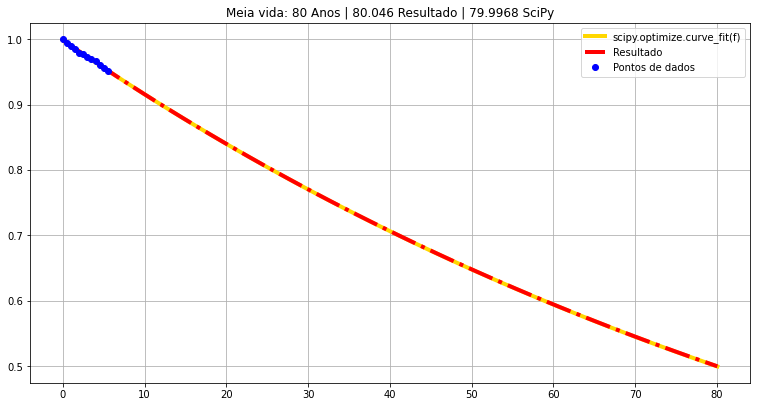

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

t = np.arange(0, 6, 0.5)
y = np.array([1.000, .994, .990, .985, .979, .977, .972, .969, .967, .960, .956, .952])

def least_squares(X, Y):
  xbar = np.mean(X) # cálculo da média de X
  ybar = np.mean(Y)  # cálculo da média de Y

  x1 = np.sum(X*(Y-ybar))/np.sum(X*(X-xbar)) #coef. angular estimado
  x0 = ybar - x1*xbar #coeficiente linear estimado
  return x0, -x1

# SOLUÇÃO: LINEARIZAR A FUNÇÂO PARA CONSEGUIR OS COEFICIENTES DE UMA FUNÇÃO LINEAR
# POR FIM, RETOMAR A LINEARIZAÇÃO PARA PLOTAR A CURVA
# y = a*exp(-bt),  Aplicando log em ambos os lados => log(y) = log(a) - bt
# log(y) = log(a) - bt => t = (log(y)-log(a))/-b

f_linearized = lambda t, a, b: np.log(a) - b * t
f_unlinear = lambda t, a, b: np.exp(f_linearized(t, a, b))

f = lambda t, a, b: a * np.exp(-b * t) # FUNÇÃO ORIGINAL PARA COMPARAÇÃO

a, b = least_squares(t, np.log(y))
a = np.exp(a)
print('Coeficientes encontrados:', a, b)

ab, _ = curve_fit(f, t, y) # Compara com a função de aproximação de curva do scipy
print('Coeficientes Scipy:', ab)

# ACHANDO A MEIA VIDA DA SUBSTÂNCIA RADIOATIVA, -> ANO EM QUE A FUNÇÃO ALCANÇA 0.50
half_life_year = (np.log(.5) - np.log(a)) / -b
print('\nMeia vida encontrada:', half_life_year)
half_life_year_scipy = (np.log(.5) - np.log(ab[0]))/-ab[1]
print('Meia vida Scipy:', half_life_year_scipy, '\n')

tt = np.linspace(0, half_life_year, 50)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_title(f'Meia vida: {int(half_life_year)} Anos | {round(half_life_year, 4)} Resultado | {round(half_life_year_scipy, 4)} SciPy')
ax.plot(tt, f(tt, *ab), label = 'scipy.optimize.curve_fit(f)', color = 'gold', linewidth = 4)
ax.plot(tt, f_unlinear(tt, a,b), '-.', label = 'Resultado', color = 'red', linewidth = 4)
ax.plot(t, y, 'ro', label = 'Pontos de dados', color = 'blue', linewidth = 4)
ax.grid()
ax.legend(loc='best')
plt.show()

---
## Questão 14
<p align = "center">
<img src = "https://lh3.googleusercontent.com/drive-viewer/AJc5JmR-FChSbS22A0X-ZUVKBCQDIyh7biMJtTlC4c7BthZlCcnGxQ05G3CIFeZzh0HPMCfpvQ8uHFU=w1366-h657" width = 300>

A manivela A B de comprimento R = 90 mm está rotacionando a uma velocidade angular constante de dθ /dt = 5 000 RPM. Pode ser demonstrado que a posição do pistão C varia o ângulo θ de acordo com:
$$x = R \left( cos{\theta}+\sqrt{2.5^2 - \sin^2{\theta}} \right)$$
Escreva um programa que plote a aceleração do pistão para θ = 0º, 5º, 10º, . . . , 180º. Use diferenciação numérica para computar a aceleração.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def resolucao(x, theta):
  """
  Encontra a solução fazendo a derivada de segunda de X
  pois se derivarmos X uma vez obtemos a velocidade,
  e derivando mais uma vez obtemos a aceleração.
  - a(θ) = d^2x/dθ^2 aceleração é a derivada segunda da função x
  """
  h = 0.1

  d2_at =  (x(theta-2*h) - 2*x(theta-h) + x(theta))/(h**2)
  d2_av =  (x(theta+2*h) - 2*x(theta+h) + x(theta))/(h**2)
  d2_cen =  (x(theta+h) - 2*x(theta) + x(theta-h))/(h**2)

  return d2_cen

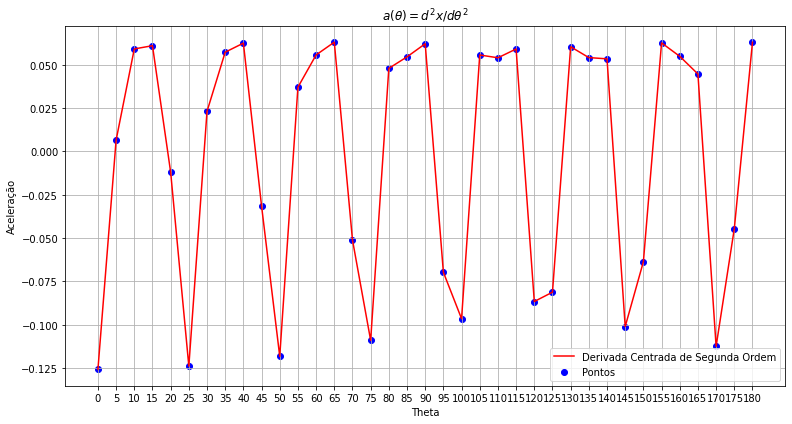

In [37]:
r = 0.09 # Metros
x = lambda θ: r * (np.cos(θ) + np.sqrt(2.5**2 - (np.sin(θ)**2)))
theta = np.arange(0, 180.1, 5)
derivada_cen = resolucao(x, theta)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title(r'$a(θ) = d^2x/dθ^2$')
  
ax.scatter(theta, derivada_cen, color = 'blue', label = 'Pontos')
ax.plot(theta, derivada_cen, 'red', label = 'Derivada Centrada de Segunda Ordem')
ax.grid()
ax.set_xticks(theta)
ax.set_xlabel('Theta')
ax.set_ylabel('Aceleração')
ax.legend(loc='best')
plt.show()

---
## Questão 15
<p align = "center">
<img src = "https://lh3.googleusercontent.com/drive-viewer/AJc5JmTttbDOd0xh22_6CchaUc7vSKTYPG0smNY_yjyNUlkehnOk6nPE8odTHg2VnkgqyTo6DNlsOY8=w1366-h657" width = 300>

As estações de radar A e B, separadas pela distância a = 500 m, rastreia o avião C registrando os ângulos $\alpha$ e $\beta$ em intervalos de 1 segundo. Se três leituras sucessivas são:
<h1><center>

|  t (s)   ||   9    |   10   |   11   |
|  :---:   || :---:  | :---:  | :---:  |
| $\alpha$ || 54.80º | 54.06º | 53.34º |
| $\beta$  || 65.59º | 64.59º | 63.62º |

</center></h1>
Calcule a velocidade v e o ângulo de subida γ no tempo t = 10s. Pode ser demonstrado que as coordenadas do plano são dadas por:
$$\begin{align*}
x = a\frac{\tan{\beta}}{\tan{\beta} - \tan{\alpha}} && y = a\frac{\tan{\alpha}\tan{\beta}}{\tan{\beta} - \tan{\alpha}}
\end{align*}$$



In [22]:
from math import radians
a = 500

beta = np.array([radians(65.59), radians(64.50), radians(63.62)])
alfa = np.array([radians(54.80), radians(54.06), radians(53.34)])

t = np.array([9, 10, 11])
x = a * (np.tan(beta) / (np.tan(beta) - np.tan(alfa)))
y = a * ((np.tan(alfa) * np.tan(beta)) / (np.tan(beta) - np.tan(alfa)))

vel = x / t

gradiente = 0.033

razão_subida = vel/gradiente # em ft/min

print('Distância:', x)
print('Altura', y)
print('Velocidade',vel)

Distância: [1401.91839832 1461.76740439 1498.64035029]
Altura [1987.34601606 2016.38729548 2013.51241079]
Velocidade [155.76871092 146.17674044 136.24003184]


---
## Questão 16
A relação entre tração σ e a deformação ε para alguns materiais biológicos em apenas uma dimensão é
$$\frac{d\sigma}{d\varepsilon} = a + b\sigma$$
onde a e b são constantes (dσ /dε é chamado módulo de tangente). A tabela abaixo exibe os resultados do teste de tração:
<h1><center>

|Strein $\varepsilon$|Strein $\sigma$ (MPa)|
|       :---:        |       :---:         |
|         0          |         0           |
|       0.05         |       0.252         |
|       0.10         |       0.531         |
|       0.15         |       0.840         |
|       0.20         |       1.184         |
|       0.25         |       1.558         |
|       0.30         |       1.975         |
|       0.35         |       2.444         |
|       0.40         |       2.943         |
|       0.45         |       3.500         |
|       0.50         |       4.115         |

</center></h1>
Determine os parâmetros a e b usando regressão linear.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def calcula_coeficientes(X, y):
  n = len(X)
  sum_X = np.sum(X)
  sum_Y = np.sum(y)
  sum_XY = np.sum(X * y)
  sum_X2 = np.sum(X * X)

  b1 = (n * sum_XY - sum_X * sum_Y) / (n * sum_X2 - sum_X * sum_X)
  b0 = (sum_Y - b1 * sum_X) / n
  
  return np.array([b0, b1])

a: 0.0380967672462657
b: 0.12051160998299439



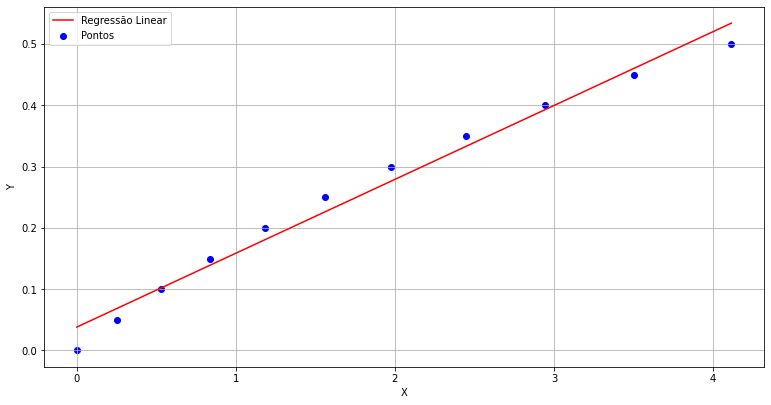

In [24]:
X = np.array([0, 0.252, 0.531, 0.840, 1.184, 1.558, 1.975, 2.444, 2.943, 3.5, 4.115])
y = np.array([0, 0.05, 0.10, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
a, b = calcula_coeficientes(X, y)
print(f'a: {a}\nb: {b}\n')
f = lambda x: a + b * x

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X, y, color='blue', label='Pontos')
ax.plot(X, f(X), 'red', label='Regressão Linear')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(loc='best')
ax.grid()
plt.show()

---
## Questão 17
Determine
$$\int_0^1\frac{\sin{x}}{\sqrt{x}}dx$$
Usando o método de integração de Romberg. Dica: utilize transformação de variáveis para eliminar a singularidade em x = 0.

In [34]:
import numpy as np
from scipy.integrate import romberg

# Regra Trapezoidal 
def trapezoide(f,a,b,N):
    h = (b-a)/N
    xi = np.linspace(a,b,N+1)
    fi = f(xi)
    s = 0.0
    for i in range(1,N):
        s = s + fi[i]
    s = (h/2)*(fi[0] + fi[N]) + h*s
    return s

# Método de Romberg
def metodo_romberg(func, a, b, tol, nmax):
  Q = np.zeros((nmax, nmax), float)
  convergiu = False

  for i in range(0,nmax):
    N = 2**i
    Q[i,0] = trapezoide(f, a, b, N)
    for k in range(0,i):
      n = k + 2
      Q[i,k+1] = 1.0/(4**(n-1)-1)*(4**(n-1)*Q[i,k] - Q[i-1,k])
    if (i > 0):
      if (abs(Q[i,k+1] - Q[i,k]) < tol):
        convergiu = True
        break 
  
  print('N =', N)
  print('Convergiu' if convergiu else 'Não convergiu')
  return Q[i,k+1]


a, b = 0, 1 # intervalo de integração

# f_original = lambda x: np.sin(x)/np.sqrt(x)
# Após a substituição -> u = sqrt{x}:
f = lambda u: 2 * np.sin(u)**2
f = lambda u: 2 * np.sin(u**2)

print('\nResultado da função criada:', metodo_romberg(f, a, b, 1e-12, 10))
print('Resultado do método de Romberg do SciPy:', romberg(f, a, b, tol=1e-12))

N = 64
Convergiu

Resultado da função criada: 0.6205366034467626
Resultado do método de Romberg do SciPy: 0.6205366034452445


---
## Questão 18
Determine
$$\int_0^{\pi/4}\frac{dx}{\sqrt{\sin{x}}}$$
Usando o método de integração de Romberg. Dica: utilize transformação $\sin{x} = {t^2}$.

In [26]:
import numpy as np 
import math

def trapz(a, b, T, i, fx):
  h = (b - a) / (2**i)

  if (i == 0):
    x = (a + h)
    y = h * (eval(fx))

  if (i > 0):
    s = 0
    for j in range (1, 1+2**(i-1)):
      x = (a + (2 * j - 1) * h)
      s += (eval(fx))
    y = 0.5*T + h*s
  
  return y

def romb(a, b, n, e, ITMAX, fx):
  #Constrói um vetor utilizando o método dos triângulos
  for i in range (0, n+1):
    if (i == 0):
      H = []
      H.append(trapz(a, b, H, i, fx))
    if (i > 0):
      H.append(trapz(a, b, H[i-1], i, fx))
  
  #Constrói um novo vetor por meio do método de Romberg e aproveitando o vetor já construído 
  IT = 0
  while (IT < ITMAX):
    for i in range (0, n+1):
      if (i == 0):
        T = []
        T.append([H[IT]])
      if (i > 0):
        T.append([H[IT+i]])
        for k in range (1, i+1):
          T[i].append(T[i][k-1]+((T[i][k-1]-T[i-1][k-1])/(-1+4**k)))
    IT+= 1  
    if (abs(T[n][n] - T[n][n-1]) <= e*abs(T[n][n])):
      break

    H.append(trapz(a, b, H[n+IT-1], n+IT, fx))

  return (T[n][n], IT)

In [27]:
fx = "1 / np.sqrt((2*(np.tan(x/2))) / 1 + ((np.tan(x/2))*(np.tan(x/2))))"
a = 0
b = np.pi/4
n = 4
e = 1e-06
# Quantidade de iterações (ITMAX) pode ser alterada para maior precisão do resultado
# Quanto maior a quantidade de iterações, mais tempo de processamento
ITMAX = 10
integral, iteracoes = romb(a, b, n, e, ITMAX, fx)

print('Iterações:', iteracoes)
print('A:', a)
print('B:', b)
print('Resultado:', integral)

Iterações: 10
A: 0
B: 0.7853981633974483
Resultado: 1.6974867062539456


---
## Questão 19
A função de erro, de grande importância para a estatística, é definida como:
$$erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dx$$
Escreva um programa que calcule erf(x) para um dado valor de x com precisão de 6 casas decimais. Teste o seu programa considerando erf(1.0) = 0.842 701.

---
## Questão 20
Escreva um programa que compute:
$$\int_{x_1}^{x_n} y(x)dx$$
para um dado conjunto de pontos:
<h1><center>

|     |     |     |     |     |
|:---:|:---:|:---:|:---:|:---:|
|$x_1$|$x_2$|$x_3$| ... |$x_n$|
|$y_1$|$y_2$|$y_3$| ... |$y_n$|

</center></h1>

Considere que os valores x possam ser **não** uniformemente espaçados.